In [3]:
import pandas as pd
import sqlite3 as sql

In [4]:
engine = sql.connect('temp1000.db')
cursor= engine.cursor()

In [5]:
url = "https://raw.github.com/pandas-dev/pandas/master/pandas/tests/io/data/csv/tips.csv"
tips = pd.read_csv(url)

In [6]:
tips.to_sql('tipsDB', con=engine)

In [7]:
cursor.execute('select * from tipsDB LIMIT 5').fetchall()

[(0, 16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2),
 (1, 10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3),
 (2, 21.01, 3.5, 'Male', 'No', 'Sun', 'Dinner', 3),
 (3, 23.68, 3.31, 'Male', 'No', 'Sun', 'Dinner', 2),
 (4, 24.59, 3.61, 'Female', 'No', 'Sun', 'Dinner', 4)]

In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
cursor.execute('PRAGMA table_info(tipsDB)').fetchall()

[(0, 'index', 'INTEGER', 0, None, 0),
 (1, 'total_bill', 'REAL', 0, None, 0),
 (2, 'tip', 'REAL', 0, None, 0),
 (3, 'sex', 'TEXT', 0, None, 0),
 (4, 'smoker', 'TEXT', 0, None, 0),
 (5, 'day', 'TEXT', 0, None, 0),
 (6, 'time', 'TEXT', 0, None, 0),
 (7, 'size', 'INTEGER', 0, None, 0)]

In [9]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
tips.smoker.map(type)

0      <class 'str'>
1      <class 'str'>
2      <class 'str'>
3      <class 'str'>
4      <class 'str'>
           ...      
239    <class 'str'>
240    <class 'str'>
241    <class 'str'>
242    <class 'str'>
243    <class 'str'>
Name: smoker, Length: 244, dtype: object

In [11]:
sql_select = 'SELECT total_bill, tip, smoker, time\
              FROM tipsDB\
              LIMIT 5'
cursor.execute(sql_select).fetchall()

[(16.99, 1.01, 'No', 'Dinner'),
 (10.34, 1.66, 'No', 'Dinner'),
 (21.01, 3.5, 'No', 'Dinner'),
 (23.68, 3.31, 'No', 'Dinner'),
 (24.59, 3.61, 'No', 'Dinner')]

In [12]:
tips[['total_bill','tip','smoker','time']].head()

,total_bill,tip,smoker,time
0,16.99,1.01,No,Dinner
1,10.34,1.66,No,Dinner
2,21.01,3.50,No,Dinner
3,23.68,3.31,No,Dinner
4,24.59,3.61,No,Dinner


In [13]:
sql_select = 'SELECT *, tip/total_bill as tip_rate\
                FROM tipsDB\
                LIMIT 5'
cursor.execute(sql_select)
cl_names = []
for x in cursor.description: 
    cl_names.append(x[0])


print(cl_names)
for row in cursor.fetchall():
    print(row)


['index', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_rate']
(0, 16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2, 0.05944673337257211)
(1, 10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3, 0.16054158607350097)
(2, 21.01, 3.5, 'Male', 'No', 'Sun', 'Dinner', 3, 0.16658733936220846)
(3, 23.68, 3.31, 'Male', 'No', 'Sun', 'Dinner', 2, 0.1397804054054054)
(4, 24.59, 3.61, 'Female', 'No', 'Sun', 'Dinner', 4, 0.14680764538430255)


In [14]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head(5)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [15]:
### WHERE ####3
sql_filter = 'SELECT * FROM tipsDB WHERE time = "Dinner" LIMIT 5'
cursor.execute(sql_filter).fetchall()

[(0, 16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2),
 (1, 10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3),
 (2, 21.01, 3.5, 'Male', 'No', 'Sun', 'Dinner', 3),
 (3, 23.68, 3.31, 'Male', 'No', 'Sun', 'Dinner', 2),
 (4, 24.59, 3.61, 'Female', 'No', 'Sun', 'Dinner', 4)]

In [16]:
tips[tips['time']=='Dinner'].head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
sql_select_3 = 'SELECT * FROM tipsDB WHERE time = "Dinner" AND tip > 5.00'
cursor.execute(sql_select_3).fetchall()

[(44, 30.4, 5.6, 'Male', 'No', 'Sun', 'Dinner', 4),
 (47, 32.4, 6.0, 'Male', 'No', 'Sun', 'Dinner', 4),
 (52, 34.81, 5.2, 'Female', 'No', 'Sun', 'Dinner', 4),
 (59, 48.27, 6.73, 'Male', 'No', 'Sat', 'Dinner', 4),
 (116, 29.93, 5.07, 'Male', 'No', 'Sun', 'Dinner', 4),
 (155, 29.85, 5.14, 'Female', 'No', 'Sun', 'Dinner', 5),
 (170, 50.81, 10.0, 'Male', 'Yes', 'Sat', 'Dinner', 3),
 (172, 7.25, 5.15, 'Male', 'Yes', 'Sun', 'Dinner', 2),
 (181, 23.33, 5.65, 'Male', 'Yes', 'Sun', 'Dinner', 2),
 (183, 23.17, 6.5, 'Male', 'Yes', 'Sun', 'Dinner', 4),
 (211, 25.89, 5.16, 'Male', 'Yes', 'Sat', 'Dinner', 4),
 (212, 48.33, 9.0, 'Male', 'No', 'Sat', 'Dinner', 4),
 (214, 28.17, 6.5, 'Female', 'Yes', 'Sat', 'Dinner', 3),
 (239, 29.03, 5.92, 'Male', 'No', 'Sat', 'Dinner', 3)]

In [18]:
tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)].head()

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


In [19]:
sql_update = 'update tipsDB set tip=NULL where tip=7.58'
cursor.execute(sql_update)
engine.commit()

In [20]:
cursor.execute('select * from tipsDB where total_bill=39.42').fetchall()

[(23, 39.42, None, 'Male', 'No', 'Sat', 'Dinner', 4)]

In [21]:
sql_isnull = 'SELECT * FROM tipsDB WHERE tip IS NULL'
cursor.execute(sql_isnull).fetchall()

[(23, 39.42, None, 'Male', 'No', 'Sat', 'Dinner', 4)]

In [22]:
#import numpy as np
tips[tips['tip'].isna()]

tips.loc[tips['tip']<3.0,'tip']=None


In [23]:
tips[tips['tip'].isna()]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,NaN,Female,No,Sun,Dinner,2
1,10.34,NaN,Male,No,Sun,Dinner,3
6,8.77,NaN,Male,No,Sun,Dinner,2
8,15.04,NaN,Male,No,Sun,Dinner,2
10,10.27,NaN,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,NaN,Male,Yes,Sat,Dinner,2
237,32.83,NaN,Male,Yes,Sat,Dinner,2
240,27.18,NaN,Female,Yes,Sat,Dinner,2
241,22.67,NaN,Male,Yes,Sat,Dinner,2


In [24]:
sql_isnotnull = 'SELECT * FROM tipsDB WHERE total_bill IS NOT NULL'
cursor.execute(sql_isnotnull).fetchall()

[(0, 16.99, 1.01, 'Female', 'No', 'Sun', 'Dinner', 2),
 (1, 10.34, 1.66, 'Male', 'No', 'Sun', 'Dinner', 3),
 (2, 21.01, 3.5, 'Male', 'No', 'Sun', 'Dinner', 3),
 (3, 23.68, 3.31, 'Male', 'No', 'Sun', 'Dinner', 2),
 (4, 24.59, 3.61, 'Female', 'No', 'Sun', 'Dinner', 4),
 (5, 25.29, 4.71, 'Male', 'No', 'Sun', 'Dinner', 4),
 (6, 8.77, 2.0, 'Male', 'No', 'Sun', 'Dinner', 2),
 (7, 26.88, 3.12, 'Male', 'No', 'Sun', 'Dinner', 4),
 (8, 15.04, 1.96, 'Male', 'No', 'Sun', 'Dinner', 2),
 (9, 14.78, 3.23, 'Male', 'No', 'Sun', 'Dinner', 2),
 (10, 10.27, 1.71, 'Male', 'No', 'Sun', 'Dinner', 2),
 (11, 35.26, 5.0, 'Female', 'No', 'Sun', 'Dinner', 4),
 (12, 15.42, 1.57, 'Male', 'No', 'Sun', 'Dinner', 2),
 (13, 18.43, 3.0, 'Male', 'No', 'Sun', 'Dinner', 4),
 (14, 14.83, 3.02, 'Female', 'No', 'Sun', 'Dinner', 2),
 (15, 21.58, 3.92, 'Male', 'No', 'Sun', 'Dinner', 2),
 (16, 10.33, 1.67, 'Female', 'No', 'Sun', 'Dinner', 3),
 (17, 16.29, 3.71, 'Male', 'No', 'Sun', 'Dinner', 3),
 (18, 16.97, 3.5, 'Female', 'No',

In [25]:
tips[tips["total_bill"].notna()]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,NaN,Female,No,Sun,Dinner,2
1,10.34,NaN,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,NaN,Female,Yes,Sat,Dinner,2
241,22.67,NaN,Male,Yes,Sat,Dinner,2
242,17.82,NaN,Male,No,Sat,Dinner,2


In [26]:
### GROUP BY ###
sql_groupby = 'SELECT sex, count(*) FROM tipsDB GROUP BY sex'
cursor.execute(sql_groupby).fetchall()


[('Female', 87), ('Male', 157)]

In [27]:
tips.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [28]:
sql = 'SELECT smoker, day, COUNT(*), AVG(tip) FROM tipsDB GROUP BY smoker, day'
cursor.execute(sql).fetchall()

[('No', 'Fri', 4, 2.8125),
 ('No', 'Sat', 45, 3.001136363636364),
 ('No', 'Sun', 57, 3.1678947368421055),
 ('No', 'Thur', 45, 2.673777777777778),
 ('Yes', 'Fri', 15, 2.714),
 ('Yes', 'Sat', 42, 2.8754761904761903),
 ('Yes', 'Sun', 19, 3.5168421052631573),
 ('Yes', 'Thur', 17, 3.0299999999999994)]

In [29]:
tips.groupby(["smoker", "day"]).agg({"tip": ['count', 'mean']})

tip          
            count      mean
smoker day                 
No     Fri      3  3.250000
       Sat     22  4.233182
       Sun     32  4.040000
       Thur    14  4.219286
Yes    Fri      7  3.644286
       Sat     20  4.017000
       Sun     15  3.954667
       Thur     8  4.052500

In [32]:
db_Airbnb = pd.read_csv('listings-2.csv')

df1 = db_Airbnb[['bedrooms','accommodates','price']]


df2 = df1.assign(price=df1['price'].str.replace('$', ''))
df3 = df2.assign(price=df2['price'].str.replace(',', '').astype(float))

df3.groupby(["bedrooms"]).mean()
df3.groupby(["bedrooms"]).agg({"price":['mean']})

#db_filtered.groupby(["bedrooms"]).agg({"price":['mean']})

,price
,mean
bedrooms,
1.0,70.696874
2.0,74.039056
3.0,99.025594
4.0,148.785185
5.0,196.000000
6.0,249.148148
7.0,402.000000
8.0,950.000000


In [33]:
df1["accommodates"].isnull().sum()


0

In [34]:
df3[["price","accommodates"]].corr()

,price,accommodates
price,1.000000,0.047998
accommodates,0.047998,1.000000


In [8]:
import numpy as np
values = np.random.randn(4)
values = np.append(values,np.nan)

df1 = pd.DataFrame({"key": ["A", "B", "C", "D","E"], "value": values})
df2 = pd.DataFrame({"key": ["B", "D", "D", "E"], "value": np.random.randn(4)})


df1.to_sql('df1DB', con=engine)
df2.to_sql('df2DB', con=engine)

In [41]:
sql_join = 'SELECT * FROM df1DB INNER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_join).fetchall()

[(1, 'B', -0.0879495523958472, 0, 'B', -1.8786700570419907),
 (3, 'D', -0.2401838470931788, 1, 'D', -0.04460579717638961),
 (3, 'D', -0.2401838470931788, 2, 'D', 1.388608154173022),
 (4, 'E', None, 3, 'E', -0.9389337960809745)]

In [42]:
pd.merge(df1, df2, on="key")

,key,value_x,value_y
0,B,-0.867286,-0.636601
1,D,0.056026,2.114399
2,D,0.056026,-0.537333
3,E,NaN,1.116720


In [43]:
sql_leftjoin = 'SELECT * FROM df1DB LEFT OUTER JOIN df2DB ON df1DB.key = df2DB.key'
cursor.execute(sql_leftjoin).fetchall()

[(0, 'A', -1.4756085325306585, None, None, None),
 (1, 'B', -0.0879495523958472, 0, 'B', -1.8786700570419907),
 (2, 'C', -0.11692675712395334, None, None, None),
 (3, 'D', -0.2401838470931788, 1, 'D', -0.04460579717638961),
 (3, 'D', -0.2401838470931788, 2, 'D', 1.388608154173022),
 (4, 'E', None, 3, 'E', -0.9389337960809745)]

In [44]:
pd.merge(df1, df2, on="key", how="left")

,key,value_x,value_y
0,A,0.171813,NaN
1,B,-0.867286,-0.636601
2,C,-0.236944,NaN
3,D,0.056026,2.114399
4,D,0.056026,-0.537333
5,E,NaN,1.116720


In [45]:
df3 = pd.DataFrame( 
        {"city": ["Chicago", "San Francisco", "New York City"], "rank": range(1, 4)}
        )

df4 = pd.DataFrame(
        {"city": ["Chicago", "Boston", "Los Angeles"], "rank": [1, 4, 5]})


In [46]:
df3.to_sql('df3DB', con=engine)
df4.to_sql('df4DB', con=engine)

ValueError: Table 'df3DB' already exists.

In [47]:
sql_union = 'SELECT *\
                FROM df3DB\
                UNION ALL\
             SELECT *\
                FROM df4DB'
cursor.execute(sql_union).fetchall()

[(0, 'Chicago', 1),
 (1, 'San Francisco', 2),
 (2, 'New York City', 3),
 (0, 'Chicago', 1),
 (1, 'Boston', 4),
 (2, 'Los Angeles', 5)]

In [48]:
header_list = ["personid", "firstname", "middleinitial","lastname","dateofbirth"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SamplePersonData"
df_Person = pd.read_csv(path_file, names=header_list)
df_Person

,personid,firstname,middleinitial,lastname,dateofbirth
0,1,Adele,S,Rosales,1984-05-05
1,2,Justus,Z,Gomez,2007-04-06
2,3,Isiah,Z,Warner,1992-06-04
3,4,Erica,L,Campos,1994-05-14
4,5,Desmond,W,Valdez,1996-11-19
...,...,...,...,...,...
995,996,Piper,D,Dunn,1980-07-20
996,997,Emmalyn,Y,Barr,1983-09-07
997,998,Audrina,X,Solis,1994-02-24
998,999,Tyler,I,Harrell,1992-02-17


In [49]:
header_list = ["studentid", "personid", "email"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleStudentData"
df_Student = pd.read_csv(path_file, names=header_list)
df_Student                         

,studentid,personid,email
0,1,1,AdeleRosales@university.com
1,2,2,JustusGomez@university.com
2,3,3,IsiahWarner@university.com
3,4,4,EricaCampos@university.com
4,5,5,DesmondValdez@university.com
...,...,...,...
995,996,996,PiperDunn@university.com
996,997,997,EmmalynBarr@university.com
997,998,998,AudrinaSolis@university.com
998,999,999,TylerHarrell@university.com


In [50]:
header_list = ["courseid", "name", "teacher"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleCourseData"
df_Course = pd.read_csv(path_file, names=header_list)
df_Course

,courseid,name,teacher
0,1,Circuit Analysis,Kellen Horton
1,2,Calculus,Kamron Saunders
2,3,Introduction to Law,Dominick Pope
3,4,Circuit Analysis,Gerardo Grimes
4,5,Human Ecology,Elaine Cabrera
5,6,Introduction to Philosophy,Sophie Norris
6,7,Arts Fundraising,Julio Cohen
7,8,Food and Culture,Farrah Cantrell
8,9,World History,Kayden Price
9,10,World History,Ellie Bass


In [51]:
header_list = ["studentid", "courseid", "grade","attempt"]
path_file = "/Users/charles/Documents/Infnet/Semana4/Sample/SampleCreditData"
df_Credit = pd.read_csv(path_file, names=header_list)
df_Credit

,studentid,courseid,grade,attempt
0,554,24,99.89,1
1,468,6,85.15,2
2,34,13,22.69,3
3,854,16,48.32,1
4,469,2,90.53,2
...,...,...,...,...
995,491,18,56.31,2
996,725,11,30.13,2
997,773,30,44.16,1
998,157,22,74.41,1


In [52]:
df_Credit.groupby(df_Credit.grade > 83.5).size()

grade
False    803
True     197
dtype: int64

In [53]:
df_Course.name.sort_values(ascending=True)

6                         Arts Fundraising
20                                Calculus
1                                 Calculus
0                         Circuit Analysis
3                         Circuit Analysis
25                      Elementary French 
19                      Elementary French 
18                    Financial Accounting
7                         Food and Culture
27                        Food and Culture
10                Foundations of Education
11              Fundamentals of Marketing 
23                      Greek Civilization
4                            Human Ecology
28     Introduction to Affective Computing
16     Introduction to Affective Computing
2                     Introduction to Law 
17                    Introduction to Law 
22              Introduction to Philosophy
5               Introduction to Philosophy
26    Introduction to Professional Writing
29             Introduction to Programming
15                  Literature and Culture
13         

In [54]:
df_Person[df_Person.lastname.str.contains("ez")]

,personid,firstname,middleinitial,lastname,dateofbirth
1,2,Justus,Z,Gomez,2007-04-06
4,5,Desmond,W,Valdez,1996-11-19
18,19,Amare,A,Hernandez,2000-09-17
117,118,Jaida,E,Martinez,2000-11-06
124,125,Aaron,S,Perez,1987-02-04
315,316,Ava,H,Velez,1996-08-13
361,362,Giada,C,Fernandez,1986-08-10
455,456,Ruben,T,Rodriquez,1989-01-12
493,494,Seth,R,Marquez,1993-10-30
556,557,Alexis,T,Velez,2003-06-08


In [55]:
df_n = df_Credit[['studentid','grade']]

In [56]:
df_n.assign(status= lambda x: np.where(x["grade"] > 70.0, "Aprovado", "Reprovado"))

#lambda x: np.where(x["grade"] > 70.0, "Apr", "Repr")

,studentid,grade,status
0,554,99.89,Aprovado
1,468,85.15,Aprovado
2,34,22.69,Reprovado
3,854,48.32,Reprovado
4,469,90.53,Aprovado
...,...,...,...
995,491,56.31,Reprovado
996,725,30.13,Reprovado
997,773,44.16,Reprovado
998,157,74.41,Aprovado


In [57]:
conditions = "courseid"
df_m = pd.merge(df_Credit,df_Course,on=conditions)

In [58]:
#df_nameCourse = df_m[df_m.grade.mean() > 70.0]
df_m.grade.mean()

55.12000999999999

In [59]:
## Realizar uma consulta que retorne os email dos alunos que cursaram 3 vezes um mesmo curso  

df_res = pd.merge(df_Student,df_Credit,on="studentid")

In [60]:
df_res1 = df_res[df_res["attempt"] == 3]

In [61]:
df_res1.email

12      KarmaGuerrero@university.com
15     AmareHernandez@university.com
16        LilahAbbott@university.com
17       EugeneMathis@university.com
18       EugeneMathis@university.com
                   ...              
986       SageCalhoun@university.com
988         LexieRich@university.com
990      ReaganBarton@university.com
991      ReaganBarton@university.com
993     JohnnyCollins@university.com
Name: email, Length: 245, dtype: object

In [62]:
## DESAFIO) Realizar uma consulta que retorne os nomes dos professores mais carrascos - isto é - aqueles cujo o número de alunos reprovados (média menor que 70.0) foi maior do que de
## alunos aprovados.

df_ = pd.merge(df_Course, df_Credit,on="courseid")

In [63]:
df_

,courseid,name,teacher,studentid,grade,attempt
0,1,Circuit Analysis,Kellen Horton,470,97.22,2
1,1,Circuit Analysis,Kellen Horton,115,69.63,2
2,1,Circuit Analysis,Kellen Horton,197,62.19,3
3,1,Circuit Analysis,Kellen Horton,331,35.78,1
4,1,Circuit Analysis,Kellen Horton,990,96.37,2
...,...,...,...,...,...,...
995,30,Introduction to Programming,Harley Albert,477,73.51,2
996,30,Introduction to Programming,Harley Albert,882,92.31,2
997,30,Introduction to Programming,Harley Albert,587,29.36,3
998,30,Introduction to Programming,Harley Albert,773,44.16,1


In [64]:
df__ = df_.assign(status= lambda x: np.where(x["grade"] > 70.0, "Aprovado", "Reprovado"))
df__

,courseid,name,teacher,studentid,grade,attempt,status
0,1,Circuit Analysis,Kellen Horton,470,97.22,2,Aprovado
1,1,Circuit Analysis,Kellen Horton,115,69.63,2,Reprovado
2,1,Circuit Analysis,Kellen Horton,197,62.19,3,Reprovado
3,1,Circuit Analysis,Kellen Horton,331,35.78,1,Reprovado
4,1,Circuit Analysis,Kellen Horton,990,96.37,2,Aprovado
...,...,...,...,...,...,...,...
995,30,Introduction to Programming,Harley Albert,477,73.51,2,Aprovado
996,30,Introduction to Programming,Harley Albert,882,92.31,2,Aprovado
997,30,Introduction to Programming,Harley Albert,587,29.36,3,Reprovado
998,30,Introduction to Programming,Harley Albert,773,44.16,1,Reprovado


In [65]:
df_f = df__.groupby(["teacher","status"]).size()

In [66]:
df_f.head()

teacher        status   
Abby Sheppard  Aprovado      2
               Reprovado    24
Allison Witt   Aprovado     19
               Reprovado    18
Andre Richard  Aprovado     13
dtype: int64

In [74]:
df_4 = df_f.reset_index(name = "Total")
df_4.groupby(['teacher']).agg({'Total': ['max']})

,Total
,max
teacher,
Abby Sheppard,24
Allison Witt,19
Andre Richard,27
Dominick Pope,21
Elaine Cabrera,19
Ellie Bass,17
Farrah Cantrell,21
Gerardo Grimes,25


In [77]:

lst_index  = (df_4.loc[range(0,len(df_4),2),'Total']) 
lst_index2  = (df_4.loc[range(1,len(df_4),2),'Total']) 

idx=[]

for i in range(len(lst_index)):
        if lst_index.values[i] < lst_index2.values[i]: 
            idx.append(lst_index2.index[i])
        else: 
            idx.append(lst_index.index[i])
        
df_4.values[idx]

array([['Abby Sheppard', 'Reprovado', 24],
       ['Allison Witt', 'Aprovado', 19],
       ['Andre Richard', 'Reprovado', 27],
       ['Dominick Pope', 'Reprovado', 21],
       ['Elaine Cabrera', 'Reprovado', 19],
       ['Ellie Bass', 'Reprovado', 17],
       ['Farrah Cantrell', 'Reprovado', 21],
       ['Gerardo Grimes', 'Reprovado', 25],
       ['Gibson Warner', 'Reprovado', 27],
       ['Harley Albert', 'Aprovado', 10],
       ['Janae Chandler', 'Reprovado', 29],
       ['Jaxon Moon', 'Reprovado', 26],
       ['Josie Hopkins', 'Reprovado', 25],
       ['Julio Cohen', 'Reprovado', 26],
       ['Kamron Saunders', 'Reprovado', 27],
       ['Kayden Price', 'Reprovado', 21],
       ['Kellen Horton', 'Reprovado', 8],
       ['Kelsey Caldwell', 'Reprovado', 18],
       ['Kylie Cameron', 'Reprovado', 33],
       ['Lilianna Watts', 'Reprovado', 22],
       ['Matias Little', 'Reprovado', 23],
       ['Mina Kidd', 'Reprovado', 20],
       ['Pamela Burch', 'Reprovado', 15],
       ['Salma Orte

In [69]:
df_4.groupby(['teacher']).max()

,status,Total
teacher,,
Abby Sheppard,Reprovado,24
Allison Witt,Reprovado,19
Andre Richard,Reprovado,27
Dominick Pope,Reprovado,21
Elaine Cabrera,Reprovado,19
Ellie Bass,Reprovado,17
Farrah Cantrell,Reprovado,21
Gerardo Grimes,Reprovado,25
Gibson Warner,Reprovado,27


In [330]:
####  Achar os estudantes do prof. Harley Albert que obtiveram média > 70.0 
### A consulta deverá retornar os seguintes atributos: FirstName, LastName, Course(Name), Média (Grade)  
df_merge_Course_Credit = pd.merge(df_Course,df_Credit,on='courseid')


In [331]:
df_Course_Credit_prof_H = df_merge_prof.loc[df_merge_Course_Credit.courseid==30]

In [332]:
df_Course_Credit_Stud_profH = pd.merge(df_Course_Credit_prof_H,df_Student,on='studentid')

In [333]:
df_Student_Course_Credit_Stud_profH = pd.merge(df_Person,df_Course_Credit_Stud_profH,on='personid')

In [334]:
df_studentnames_of_result = df_Student_Course_Credit_Stud_profH.loc[(df_Student_Course_Credit_Stud_profH.grade > 70.0)]


In [335]:
df_studentnames_of_result_ =df_studentnames_of_result[['firstname','lastname','name','grade']]

In [336]:
df_studentnames_of_result_

,firstname,lastname,name,grade
0,Laura,Herrera,Introduction to Programming,78.88
1,Jairo,Mcintyre,Introduction to Programming,88.39
2,Elyse,Rowe,Introduction to Programming,91.64
5,Kevin,Lewis,Introduction to Programming,76.29
6,Deangelo,Rose,Introduction to Programming,71.76
9,Jeramiah,Adams,Introduction to Programming,73.51
13,Lacey,Hobbs,Introduction to Programming,72.66
14,Jensen,Simmons,Introduction to Programming,88.73
18,Lillian,Dale,Introduction to Programming,92.31
19,Ezekiel,Buckley,Introduction to Programming,95.00


In [8]:
import pandas as pd
#dfClean = pd.read_csv('dirtydata_Semana5.csv')
dfClean = pd.read_csv('data.csv')
dfClean

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


In [9]:
dfClean['Date'].str.match("'[0-9]{4}/[0-9]{2}/[0-9]{2}'")

KeyError: 'Date'

In [10]:
#### Verifica se tem duplicatas no Dataframe ###3
dfClean[dfClean.duplicated()]

,Duration,Pulse,Maxpulse,Calories
36,60,102,127,300.0
37,60,100,120,300.0
38,60,100,120,300.0
40,45,90,112,180.1
71,60,109,153,387.6
113,45,100,120,225.3
155,60,111,151,368.5


In [11]:
### Remove as duplicatas ####
dfClean.drop_duplicates(inplace=True)

In [12]:
### Reset_index #### 
dfClean.reset_index(drop=True)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
157,60,105,140,290.8
158,60,110,145,300.0
159,60,115,145,310.2
160,75,120,150,320.4


In [13]:
### Verifica se tem valores nulos na tabela ###
dfClean.isnull().sum()

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

In [14]:
dfClean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  162 non-null    int64  
 1   Pulse     162 non-null    int64  
 2   Maxpulse  162 non-null    int64  
 3   Calories  157 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 6.3 KB


In [15]:
### Tipos de uma coluna #### 
dfClean.Calories.map(type)

0      <class 'float'>
1      <class 'float'>
2      <class 'float'>
3      <class 'float'>
4      <class 'float'>
            ...       
164    <class 'float'>
165    <class 'float'>
166    <class 'float'>
167    <class 'float'>
168    <class 'float'>
Name: Calories, Length: 162, dtype: object

In [16]:
### Visualiza a coluna Calories #####
dfClean[dfClean.Calories.isna()]

,Duration,Pulse,Maxpulse,Calories
17,45,90,112,NaN
27,60,103,132,NaN
91,45,107,137,NaN
118,60,105,125,NaN
141,60,97,127,NaN


In [17]:
#### Substituir pela média ##### 
avg_45 = dfClean[dfClean.Duration==45].Calories.mean()
avg_45

277.7870967741935

In [18]:
avg_60 = dfClean[dfClean.Duration==60].Calories.mean()
avg_60

340.2704225352114

In [19]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==60),'Calories'] = avg_60

In [20]:
dfClean.loc[(dfClean.Calories.isna()) & (dfClean.Duration==45),'Calories'] = avg_45

In [21]:
dfClean[dfClean.Calories.isnull()]

,Duration,Pulse,Maxpulse,Calories


In [22]:
## Visualização do DataFrame ###### 


### Regressão Linear #####

#### Coeficiente de Determinação (R-squared) : 

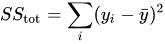
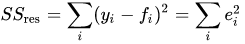
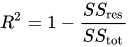

#### Mean squared error :

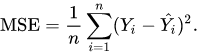

 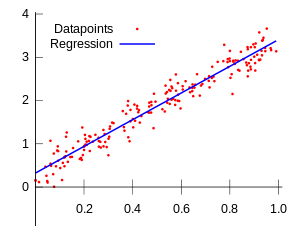

In [25]:
dfClean.describe()

,Duration,Pulse,Maxpulse,Calories
count,162.000000,162.000000,162.000000,162.000000
mean,64.197531,107.709877,134.265432,377.435095
std,43.151882,14.711588,16.471618,267.381894
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,255.075000
50%,60.000000,105.500000,131.000000,320.700000
75%,60.000000,111.000000,141.000000,386.700000
max,300.000000,159.000000,184.000000,1860.400000


In [23]:
dfClean.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.162098,0.003578,0.923190
Pulse,-0.162098,1.000000,0.787035,0.019258
Maxpulse,0.003578,0.787035,1.000000,0.197465
Calories,0.923190,0.019258,0.197465,1.000000


In [24]:
### P-Values
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dfClean['Duration'], dfClean['Calories'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.9231899432094213  with a P-value of P = 2.447193062824461e-68


In [4]:
#### Visualizar Duration x Calories 


In [84]:
from sklearn.linear_model import LinearRegression

In [89]:
### Definir as Variáveis X e Y 
X = 
Y = 

In [26]:
### Acha a reta que melhor descreve a distribuição dos dados 


In [27]:
### Usa o modelo para predição #### 
  

In [29]:
### R-squared #####
#print('The R-square is: ', lr.score(X, Y))

In [30]:
#### MSE - Mean Squared Error #### 
from sklearn.metrics import mean_squared_error

#print('The mean square error of Calories and predicted value is: ', mse)

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [1]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
#sns.regplot(x="Duration", y="Calories", data=dfClean)


In [2]:
#width = 12
#height = 10
#plt.figure(figsize=(width, height))
#x =dfClean['Duration']
#y = dfClean['Calories']
#sns.residplot(x,y)
#plt.show()